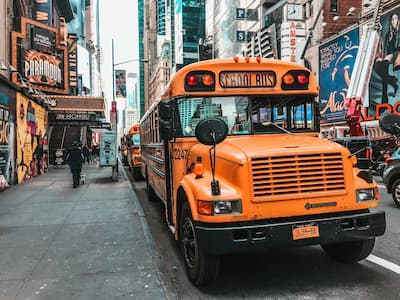



Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

We have been provided with a dataset called `schools.csv`, which is previewed below, and we have been tasked with answering three key questions about New York City (NYC) public school SAT performance. The questions are as follows:

### 1) Which are the best maths school?
### 2) Which are the top 10 schools in NYC?
### 3) Which NYC borough has the highest standard deviation for total_SAT?

### Let's first see how our data looks...

In [60]:
# Re-run this cell 
import pandas as pd

# Read in the data
original = pd.read_csv("F:\Downloads\scores.csv")

original.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


### Using the above data won't be very meaningful and helpful for our analsis. I have cleaned the data using excel and saved into a .csv file named "schools_data_cleaned.csv". Let's import the file 

In [61]:
# Read in the data
schools = pd.read_csv("F:\Downloads\schools_data_cleaned.csv")

schools.head()

,School ID,school_name,borough,building Code,average_math,average_reading,average_writing,percent_tested
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,657.0,601.0,601.0,91.00%
1,02M294,Essex Street Academy,Manhattan,M445,395.0,411.0,387.0,78.90%
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,418.0,428.0,415.0,65.10%
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,613.0,453.0,463.0,95.90%
4,01M292,Henry Street School for International Studies,Manhattan,M056,410.0,406.0,381.0,59.70%


### Let's start answering our questions one by one.

In [44]:
# let's identify schools having at least 80% score in maths
best_math_schools = schools[(schools["average_math"]>= 640)][["school_name","average_math"]].sort_values("average_math", ascending=False)


#Which are the best maths school?
print("Following are some best math schools in NYC: " ,best_math_schools)

Following are some best math schools in NYC:                                             school_name  average_math
103                             Stuyvesant High School         754.0
201                       Bronx High School of Science         714.0
108                Staten Island Technical High School         711.0
422  Queens High School for the Sciences at York Co...         701.0
78   High School for Mathematics, Science, and Engi...         683.0
324                     Brooklyn Technical High School         682.0
383                        Townsend Harris High School         680.0
206  High School of American Studies at Lehman College         669.0
0    New Explorations into Science, Technology and ...         657.0
53                       Eleanor Roosevelt High School         641.0


### We have got the answer to our first question. Now let's head over to the secound.

In [46]:
#Let's identify top 10 performing schools based on scores of 3 SAT sections:

#Let's add all the three sections to get the "Total_SAT"
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

#Check if we got the newly created column : "total_SAT"
schools.head()

,School ID,school_name,borough,building Code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,657.0,601.0,601.0,91.00%,1859.0
1,02M294,Essex Street Academy,Manhattan,M445,395.0,411.0,387.0,78.90%,1193.0
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,418.0,428.0,415.0,65.10%,1261.0
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,613.0,453.0,463.0,95.90%,1529.0
4,01M292,Henry Street School for International Studies,Manhattan,M056,410.0,406.0,381.0,59.70%,1197.0


### Yes we got it!!

In [52]:
#These are Top 10 schools
top_10_schools = schools.groupby("school_name", as_index=False)["total_SAT"].mean().sort_values("total_SAT", ascending=False).head(10)

#Which are the top 10 schools in NYC?
print("Following are the top 10 schools in NYC: " , top_10_schools)


Following are the top 10 schools in NYC:                                             school_name  total_SAT
374                             Stuyvesant High School     2144.0
372                Staten Island Technical High School     2041.0
63                        Bronx High School of Science     2041.0
217  High School of American Studies at Lehman College     2013.0
383                        Townsend Harris High School     1981.0
336  Queens High School for the Sciences at York Co...     1947.0
32                      Bard High School Early College     1914.0
95                      Brooklyn Technical High School     1896.0
139                      Eleanor Roosevelt High School     1889.0
209  High School for Mathematics, Science, and Engi...     1889.0


### After finding the top schools, it is important to the for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend, and in which borough should tha school be.

### The borough having highest standard deviation for total SAT will make the parents to re-think before addmitting their students to a school belonging to that borough.

In [53]:
# Let's locate the borough with largest Standard Devation of "Total_SAT"
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and reset index so borough is a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

#Which NYC borough has the highest standard deviation for total_SAT?
print(largest_std_dev, " has the highest standard deviation for total_SAT")

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29  has the highest standard deviation for total_SAT


### We got "Manhattan" as our borough which has the highest standard deviation for the SAT performance.